### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data = data.rename(columns={'passanger':'passenger'}) # added by me

data.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
null_num = data.isnull().sum()
print(null_num)

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# We will not use the "car" column in our analysis, so we will ignore this column.

# Let us see how many rows have a missing value in a non-car column:
col_list = data.columns.tolist()
col_list.remove('car')
mask = ( data[col_list[0]].isna() )
for c in col_list[1:]:  
    mask = mask | ( data[c].isna() )
num_na_rows = len(data[mask])
num_rows = len(data)

print(f"Percentage of rows having a missing value in a non-'car' column: {100.*num_na_rows/num_rows}%")
# ^ Output says <5% of rows have a missing value in a non-'car' column.
# This is not much, so we will just drop these rows.

# Drop all rows with a missing value in a non-'car' column
data = data.dropna(subset = col_list) 
print("Have now dropped rows having a missing value in a non-'car' column")




Percentage of rows having a missing value in a non-'car' column: 4.769788710186061%
Have now dropped rows having a missing value in a non-'car' column


4. What proportion of the total observations chose to accept the coupon?



In [6]:
num_accept = data[ data['Y']==1 ]['Y'].sum()
num_total =  len(data)
proportion_accept = num_accept / num_total

print(f"About {100.*proportion_accept}% of the total observations accepted the coupon.")

About 56.93352098683666% of the total observations accepted the coupon.


5. Use a bar plot to visualize the `coupon` column.

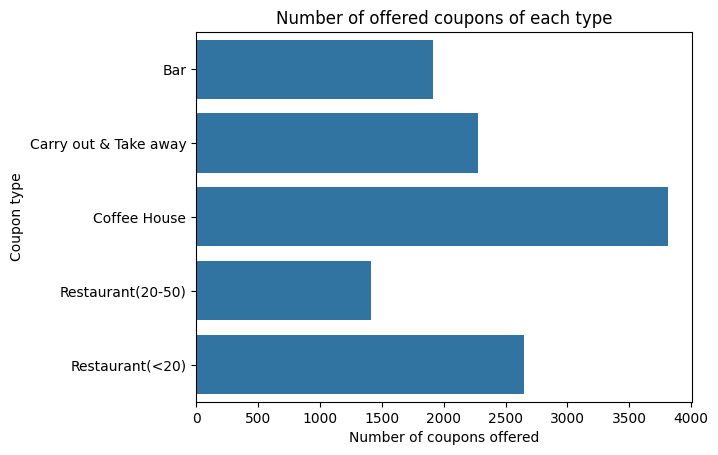

In [7]:
coupon_type_nums = data.groupby('coupon').size() \
    .reset_index(name='num') # to set to 'num' the name of the column counting the num
coupon_type_barplot = sns.barplot(y='coupon', x='num', data=coupon_type_nums)
plt.title('Number of offered coupons of each type')
coupon_type_barplot.set_xlabel('Number of coupons offered')
coupon_type_barplot.set_ylabel('Coupon type')
plt.savefig('Plots/NumberOfOfferedCouponsOfEachType.png')
plt.show()

6. Use a histogram to visualize the temperature column.

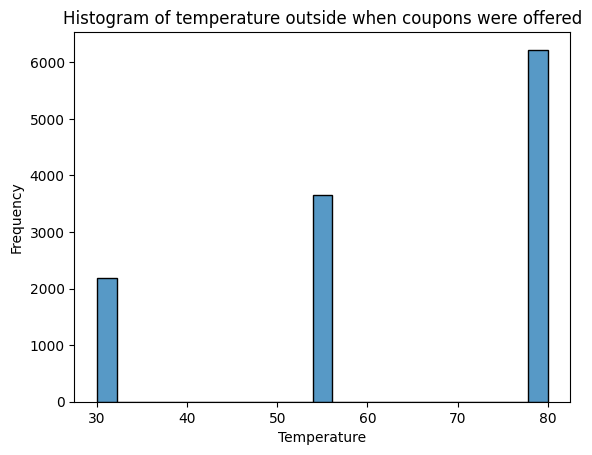

In [8]:
temperature_hplot = sns.histplot(x='temperature', data=data)
plt.title('Histogram of temperature outside when coupons were offered')
temperature_hplot.set_xlabel('Temperature')
temperature_hplot.set_ylabel('Frequency')
plt.savefig('Plots/TemperatureHistogram.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
data_justbar = data[ data['coupon'] == 'Bar' ]

2. What proportion of bar coupons were accepted?


In [10]:
num_baraccept = len( data_justbar[ data_justbar['Y']==1 ] )
proportion_baraccept = num_baraccept / len( data_justbar )

print(f"About {100.*proportion_baraccept}% of the bar coupons were accepted.")

About 41.19184526921067% of the bar coupons were accepted.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
indicates_3fewer = ['never', 'less1', '1~3']
indicates_4ormore = ['gt8', '4~8']
num_3fewer = len( data_justbar[ data_justbar['Bar'].isin(indicates_3fewer) ] )
num_3fewer_accept = len( data_justbar[ (data_justbar['Y']==1) & (data_justbar['Bar'].isin(indicates_3fewer)) ] )
num_4ormore = len( data_justbar[ data_justbar['Bar'].isin(indicates_4ormore) ] )
num_4ormore_accept = len( data_justbar[ (data_justbar['Y']==1) & (data_justbar['Bar'].isin(indicates_4ormore)) ] )
proportion_accept_among_3fewer = num_3fewer_accept / num_3fewer
proportion_accept_among_4ormore = num_4ormore_accept / num_4ormore

print(f"Among those who went to bars 3 or fewer times a month, {100.*proportion_accept_among_3fewer}% of the bar coupons were accepted.")
print(f"Among those who went to bars more than 3 times a month, {100.*proportion_accept_among_4ormore}% of the bar coupons were accepted.")

Among those who went to bars 3 or fewer times a month, 37.26744186046512% of the bar coupons were accepted.
Among those who went to bars more than 3 times a month, 76.16580310880829% of the bar coupons were accepted.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
 # Treating "1 to 3 times a month" as "more than once a month"

indicates_ageover25 = ['46', '26', '31', '41', '50plus', '36']
indicates_moreonce = ['1~3', 'gt8', '4~8']

# In this jupyter cell, "condition" means "bar more than once a month & age over 25"

num_condition = len( data_justbar[ (data_justbar['Bar'].isin(indicates_moreonce)) \
                                   & (data_justbar['age'].isin(indicates_ageover25)) ] )
num_condition_accept = len( data_justbar[ (data_justbar['Bar'].isin(indicates_moreonce)) \
                                   & (data_justbar['age'].isin(indicates_ageover25)) \
                                   & (data_justbar['Y']==1) ] )
num_total = len( data_justbar )
num_not_condition = num_total - num_condition
num_total_accept = len( data_justbar[ data_justbar['Y']==1 ] )
num_not_condition_accept = num_total_accept - num_condition_accept
proportion_accept_among_condition = num_condition_accept / num_condition
proportion_accept_among_not_condition = num_not_condition_accept / num_not_condition
print(f"Bar coupon acceptance rate among drivers who go to a bar more than once a month and are over the age of 25: {100.*proportion_accept_among_condition}%")
print(f"Bar coupon acceptance rate among all other drivers: {100.*proportion_accept_among_not_condition}%")

Bar coupon acceptance rate among drivers who go to a bar more than once a month and are over the age of 25: 68.98263027295285%
Bar coupon acceptance rate among all other drivers: 33.77483443708609%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [13]:
# In this jupyter cell, "condition" means "bar more than once a month & had a passenger that was not a kid & occupation other than farming, fishing, forestry"

indicates_moreonce = ['1~3', 'gt8', '4~8']
condition_mask = ( data_justbar['occupation']!='Farming Fishing & Forestry' ) & \
                    ( data_justbar['Bar'].isin(indicates_moreonce) ) & \
                    ( ~ data_justbar['passenger'].isin(['Kid(s)','Alone']) )

num_condition = len( data_justbar[ condition_mask ] )
num_condition_accept = len( data_justbar[ condition_mask  & (data_justbar['Y']==1) ] )

num_total = len( data_justbar )
num_not_condition = num_total - num_condition
num_total_accept = len( data_justbar[ data_justbar['Y']==1 ] )
num_not_condition_accept = num_total_accept - num_condition_accept

proportion_accept_among_condition = num_condition_accept / num_condition
proportion_accept_among_not_condition = num_not_condition_accept / num_not_condition
print(f"Bar coupon acceptance rate among drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {100.*proportion_accept_among_condition}%")
print(f"Bar coupon acceptance rate among all other drivers: {100.*proportion_accept_among_not_condition}%")

Bar coupon acceptance rate among drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 71.42857142857143%
Bar coupon acceptance rate among all other drivers: 37.87703016241299%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [14]:
accept_mask = ( data_justbar['Y']==1 )

cond_mask = []

# Condition 0: go to bars more than once a month, had passengers that were not a kid, and were not widowed
# Condition 1: go to bars more than once a month and are under the age of 30
# Condition 2: go to cheap restaurants more than 4 times a month and income is less than 50K

cond_mask.append( ( data_justbar['Bar'].isin(['1~3', 'gt8', '4~8']) ) & \
                    ( data_justbar['passenger'].isin(['Kid(s)','Alone']) ) & \
                    ( data_justbar['maritalStatus']!='Widowed' )  )
cond_mask.append( ( data_justbar['Bar'].isin(['1~3', 'gt8', '4~8']) ) & \
                 ( data_justbar['age'].isin(['21', '26', 'below21']) ) )
cond_mask.append( ( data_justbar['RestaurantLessThan20'].isin(['4~8', 'gt8']) ) & \
                ( data_justbar['income'].isin(['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']) ) )

num_cond = []
num_cond_accept = []
proportion_accept_amongcond = []

for i in range(3):
    num_cond.append( len( data_justbar[ cond_mask[i] ] ) )
    num_cond_accept.append( len( data_justbar[ cond_mask[i] & accept_mask ] ) )
    proportion_accept_amongcond.append( num_cond_accept[i] / num_cond[i] )

print("Bar coupon acceptance rate among drivers who:")
print(f"\tgo to bars more than once a month, had passengers that were not a kid, and were not widowed: {100.*proportion_accept_amongcond[0]}%")
print(f"\tgo to bars more than once a month and are under the age of 30: {100.*proportion_accept_amongcond[1]}%")
print(f"\tgo to cheap restaurants more than 4 times a month and income is less than 50K: {100.*proportion_accept_amongcond[2]}%")

Bar coupon acceptance rate among drivers who:
	go to bars more than once a month, had passengers that were not a kid, and were not widowed: 67.1018276762402%
	go to bars more than once a month and are under the age of 30: 71.95121951219512%
	go to cheap restaurants more than 4 times a month and income is less than 50K: 45.645645645645644%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [15]:
print('''
Drivers who go to bars more often seem more likely to accept the coupon. \
Also, accepting the coupon seems more likely among drivers in their 20s. \
The data suggests this because drivers who go to bars more than once a month and are over 25, \
had a lower acceptance rate than drivers who go to bars more than once a month but are under 30.
''')


Drivers who go to bars more often seem more likely to accept the coupon. Also, accepting the coupon seems more likely among drivers in their 20s. The data suggests this because drivers who go to bars more than once a month and are over 25, had a lower acceptance rate than drivers who go to bars more than once a month but are under 30.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [16]:
# We will investigate the Restaurant(<20) coupon group. 

data_R20 = data[ data['coupon'] == 'Restaurant(<20)' ]

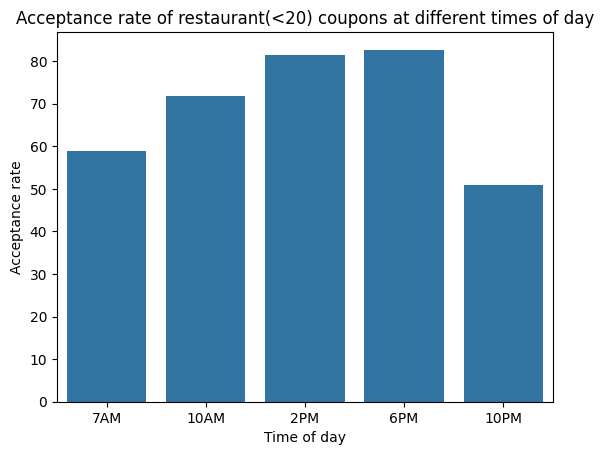


From the output, we see people are not as likely to accept the coupon at early morning (7AM) and late night (10PM),
and are reasonably likely to accept the coupon at less-early morning (10AM),
but are very likely to accept the coupon in the afternoon and evening (2PM, 6PM).

Hence we suggest focusing on a time range such as 1PM-7PM to maximize coupon acceptance.



In [17]:
# Here we check at which times are people more likely to accept a restaurant(<20) coupon.

cat_to_check = 'time'
data_R20_bycat = pd.concat( [ data_R20.groupby(cat_to_check).size().rename('NumTotal') , \
                              data_R20[ data_R20['Y']==1 ].groupby(cat_to_check).size().rename('NumY') ] , axis=1 )
data_R20_bycat['PercentY'] = 100.*data_R20_bycat['NumY'] / data_R20_bycat['NumTotal']

# rearrange time index to increasing order
time_order = ['7AM','10AM','2PM','6PM','10PM']
data_R20_bycat = data_R20_bycat.reindex(time_order)

# Get bar plot
R20_barplot = sns.barplot(x=cat_to_check, y='PercentY', data=data_R20_bycat)
plt.title('Acceptance rate of restaurant(<20) coupons at different times of day')
R20_barplot.set_xlabel('Time of day')
R20_barplot.set_ylabel('Acceptance rate')
plt.savefig('Plots/Restaurant(<20)CouponAcceptanceRateByTimeOfDay.png')
plt.show()

print('''
From the output, we see people are not as likely to accept the coupon at early morning (7AM) and late night (10PM),
and are reasonably likely to accept the coupon at less-early morning (10AM),
but are very likely to accept the coupon in the afternoon and evening (2PM, 6PM).

Hence we suggest focusing on a time range such as 1PM-7PM to maximize coupon acceptance.
''')

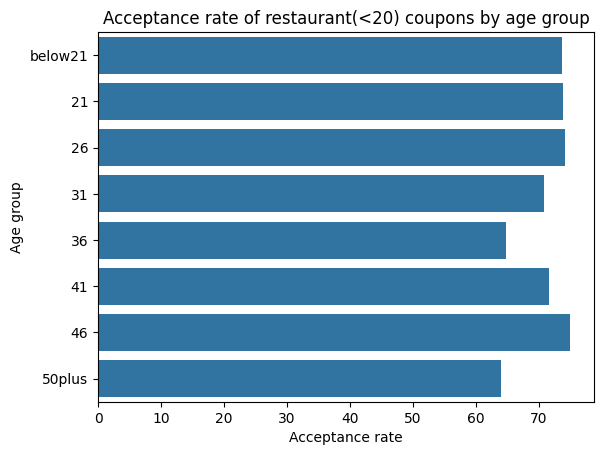


From the output, we see that there is not a lot of variance (only up to ~ 11 percentage points), but drivers age 25 and under seem most consistent in being more likely to accept the coupon.

Hence, a possible strategy would be to target the under 25 age group.



In [18]:
# Here we check acceptance rates of a restaurant(<20) coupon among different driver ages.

cat_to_check = 'age'
data_R20_bycat = pd.concat( [ data_R20.groupby(cat_to_check).size().rename('NumTotal') , \
                              data_R20[ data_R20['Y']==1 ].groupby(cat_to_check).size().rename('NumY') ] , axis=1 )
data_R20_bycat['PercentY'] = 100.*data_R20_bycat['NumY'] / data_R20_bycat['NumTotal']

# rearrange age index to increasing order. Only "below 21" needs to be moved
age_index_order = data_R20_bycat.index.tolist()
age_index_order.remove('below21')
age_index_order.insert(0, 'below21')
data_R20_bycat = data_R20_bycat.reindex(age_index_order)

# Get bar plot
R20_barplot = sns.barplot(y=cat_to_check, x='PercentY', data=data_R20_bycat)
plt.title('Acceptance rate of restaurant(<20) coupons by age group')
R20_barplot.set_xlabel('Acceptance rate')
R20_barplot.set_ylabel('Age group')
plt.savefig('Plots/Restaurant(<20)CouponAcceptanceRateByAgeGroup.png')
plt.show()

print('''
From the output, we see that there is not a lot of variance (only up to ~ 11 percentage points), but drivers age 25 and under seem most consistent in being more likely to accept the coupon.

Hence, a possible strategy would be to target the under 25 age group.
''')

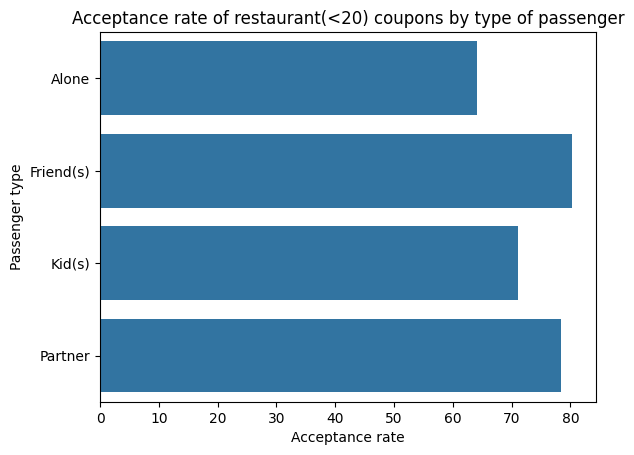


From the output, we see the driver is more likely to accept the coupon when they are not alone, and even more likely to accept when the other passengers are not kids.

Hence, we suggest targeting drivers who are not alone, and especially drivers with other adult passengers.



In [19]:
# Here we check acceptance rates of a restaurant(<20) coupon for different types of passengers.

cat_to_check = 'passenger'
data_R20_bycat = pd.concat( [ data_R20.groupby(cat_to_check).size().rename('NumTotal') , \
                              data_R20[ data_R20['Y']==1 ].groupby(cat_to_check).size().rename('NumY') ] , axis=1 )
data_R20_bycat['PercentY'] = 100.*data_R20_bycat['NumY'] / data_R20_bycat['NumTotal']

# Get bar plot
R20_barplot = sns.barplot(y=cat_to_check, x='PercentY', data=data_R20_bycat)
plt.title('Acceptance rate of restaurant(<20) coupons by type of passenger')
R20_barplot.set_xlabel('Acceptance rate')
R20_barplot.set_ylabel('Passenger type')
plt.savefig('Plots/Restaurant(<20)CouponAcceptanceRateByPassenger.png')
plt.show()

print('''
From the output, we see the driver is more likely to accept the coupon when they are not alone, and even more likely to accept when the other passengers are not kids.

Hence, we suggest targeting drivers who are not alone, and especially drivers with other adult passengers.
''')


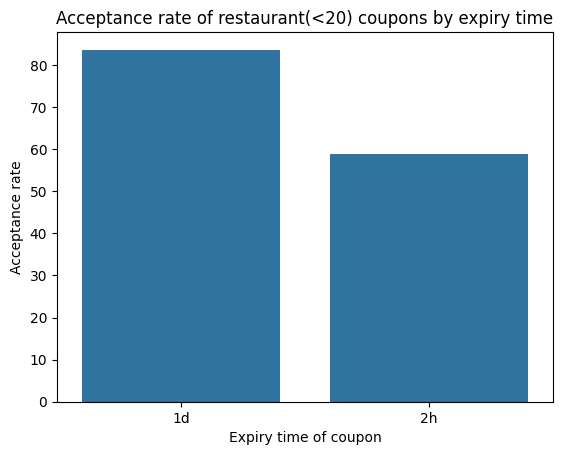


From the output, we see that there is a clear increase (by nearly 25 percentage points) in acceptance rates when the expiry is 1 day instead of 2 hours.

Based on this, we suggest using coupons with the an expiry time of 1 day instead of 2 hours.



In [20]:
# Here we check acceptance rates of a restaurant(<20) coupon for different expiry times.

cat_to_check = 'expiration'
data_R20_bycat = pd.concat( [ data_R20.groupby(cat_to_check).size().rename('NumTotal') , \
                              data_R20[ data_R20['Y']==1 ].groupby(cat_to_check).size().rename('NumY') ] , axis=1 )
data_R20_bycat['PercentY'] = 100.*data_R20_bycat['NumY'] / data_R20_bycat['NumTotal']

# Get bar plot
R20_barplot = sns.barplot(x=cat_to_check, y='PercentY', data=data_R20_bycat)
plt.title('Acceptance rate of restaurant(<20) coupons by expiry time')
R20_barplot.set_ylabel('Acceptance rate')
R20_barplot.set_xlabel('Expiry time of coupon')
plt.savefig('Plots/Restaurant(<20)CouponAcceptanceRateByExpiry.png')
plt.show()

print('''
From the output, we see that there is a clear increase (by nearly 25 percentage points) in acceptance rates when the expiry is 1 day instead of 2 hours.

Based on this, we suggest using coupons with the an expiry time of 1 day instead of 2 hours.
''')